<a href="https://colab.research.google.com/github/geovalexis/ml-in-args/blob/master/ml/ML_for_AMR_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read data

In [7]:
args_df = pd.read_csv("/content/drive/MyDrive/TFM/data/args_data_latest_cleaned.tsv", sep="\t", header=0)
args_df

,sample_name,NarA,NarB,aac(3)-IId,aac(3)-VIa,aac(6')-Iaa,aac(6')-aph(2''),aadA1,aadA2,aadE-Cc,...,ere(A),erm(42),fosA3,mph(E),msr(E),qnrA1,qnrB2,qnrB77,qnrS2,tet(D)
0,GCA_012637185.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GCA_012637285.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GCA_012637315.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GCA_012637385.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCA_012637425.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,GCA_008519545.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6204,GCA_008476005.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6205,GCF_001480865.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6206,GCA_007474515.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
snps_df = pd.read_csv("/content/drive/MyDrive/TFM/data/card_snps_data_latest_cleaned.tsv", sep="\t", header=0)
snps_df

,SAMPLE_ID,S357N,D350N,E350Q,E448K,R234F,T86I,D87N,S80I,S83F,T18P,D87Y,D87G,S464Y,G103S,Y137H,S83L,V146F
0,GCA_003869435.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GCA_003870275.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GCA_003870555.1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0
3,GCA_003872315.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,GCA_003872455.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,GCF_001952475.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5605,GCF_001952565.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5606,GCF_003589785.1,1,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0
5607,GCF_003589805.1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
amr_labels_df = pd.read_csv("/content/drive/MyDrive/TFM/data/amr_labels_latest_cleaned.tsv", sep="\t", header=0)
amr_labels_df

,SampleID,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0,GCA_007192475.1,1.0,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCA_007191145.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCA_007188155.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCA_007190575.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0
4,GCA_007194615.1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,GCA_006500015.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
6203,GCA_006497875.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,1.0
6204,GCA_006497955.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
6205,GCA_006815005.1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,1.0,1.0,0.0


# Preprocess data

For some reason, the sample `GCF_001242765.1` does not have AMR label information:

In [10]:
args_df = args_df[args_df["sample_name"] != "GCF_001242765.1"]

In [11]:
snps_df = snps_df[snps_df["SAMPLE_ID"] != "GCF_001242765.1"]

Add a prefix to all the columns in order to identify the type of data once the data has been merge: "gene/"  and "snp/"

In [12]:
args_df = args_df.set_index("sample_name").add_prefix("gene/").reset_index()

In [13]:
snps_df = snps_df.set_index("SAMPLE_ID").add_prefix("snp/").reset_index()

What type of values are they?

In [14]:
args_df.drop("sample_name", axis=1).apply(pd.value_counts)
# Binary

,gene/NarA,gene/NarB,gene/aac(3)-IId,gene/aac(3)-VIa,gene/aac(6')-Iaa,gene/aac(6')-aph(2''),gene/aadA1,gene/aadA2,gene/aadE-Cc,gene/ant(2'')-Ia,...,gene/ere(A),gene/erm(42),gene/fosA3,gene/mph(E),gene/msr(E),gene/qnrA1,gene/qnrB2,gene/qnrB77,gene/qnrS2,gene/tet(D)
0,6207.0,6207.0,6101,5809,926,6207.0,5623,6104,6136,6108,...,6205,6206,6197,6206,6206,6206,6205,6206,6205,6202
1,NaN,NaN,106,398,5281,NaN,584,103,71,99,...,2,1,10,1,1,1,2,1,2,5


In [15]:
snps_df.drop("SAMPLE_ID", axis=1).apply(pd.value_counts)
# Categorical

,snp/ S357N,snp/D350N,snp/E350Q,snp/E448K,snp/R234F,snp/T86I,snp/D87N,snp/S80I,snp/S83F,snp/T18P,snp/D87Y,snp/D87G,snp/S464Y,snp/ G103S,snp/Y137H,snp/S83L,snp/V146F
0,175.0,175.0,227.0,184.0,2681,5438.0,5587.0,5606.0,5590.0,5601.0,5584.0,5600.0,5607.0,5561.0,5561.0,5607.0,5607.0
1,5433.0,5433.0,5381.0,5424.0,556,170.0,21.0,2.0,18.0,7.0,24.0,8.0,1.0,47.0,47.0,1.0,1.0
2,NaN,NaN,NaN,NaN,2371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's how much imbalance we have:



In [16]:
amr_labels_df.drop("SampleID", axis=1).apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,4689,3790,4773,4087,4683,5238,6022,5576,5931,3623,3557,2863,5365
1.0,753,1652,669,707,759,204,185,630,275,1818,1539,3343,76


# Try differente ML approaches

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Approach 1: both ARGs and SNPs

In [ ]:
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,3770,2973,3840,3781,3769,4292,4441,3887,4381,2856,3016,1979,4396
1.0,678,1475,608,667,679,156,7,561,67,1592,1432,2469,52


In [ ]:
X = pd.merge(args_df, snps_df, how="left", left_on="sample_name", right_on="SAMPLE_ID")
X = pd.merge(y.reset_index()[["sample_name"]], X, how="left", on="sample_name")
X = X.fillna(-1).drop("SAMPLE_ID", axis=1).set_index("sample_name") #TODO: double check that most of the SNPs have a correct value (!= -1) when all data is loaded
X

,gene/NarA,gene/NarB,gene/aac(3)-IId,gene/aac(3)-VIa,gene/aac(6')-Iaa,gene/aac(6')-aph(2''),gene/aadA1,gene/aadA2,gene/aadE-Cc,gene/ant(2'')-Ia,...,snp/S80I,snp/S83F,snp/T18P,snp/D87Y,snp/D87G,snp/S464Y,snp/ G103S,snp/Y137H,snp/S83L,snp/V146F
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_003869435.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_003870275.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_003870555.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_003872315.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_003872455.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_001242565.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_007189195.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_008426085.1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8629213483146068


In [ ]:
print(classification_report(y_test, y_pred, target_names=y.columns))

                               precision    recall  f1-score   support

  amoxicillin-clavulanic acid       0.97      0.96      0.96       127
                   ampicillin       0.99      0.97      0.98       293
                    cefoxitin       0.89      0.99      0.94       109
                    ceftiofur       0.98      0.98      0.98       123
                  ceftriaxone       0.98      0.95      0.96       128
              chloramphenicol       0.96      0.81      0.88        31
                ciprofloxacin       0.00      0.00      0.00         1
                   gentamicin       0.94      0.89      0.92       123
               nalidixic acid       1.00      0.43      0.60        14
                 streptomycin       0.89      0.93      0.91       321
                sulfisoxazole       0.98      0.97      0.98       289
                 tetracycline       0.98      0.98      0.98       498
trimethoprim-sulfamethoxazole       1.00      0.67      0.80        12

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


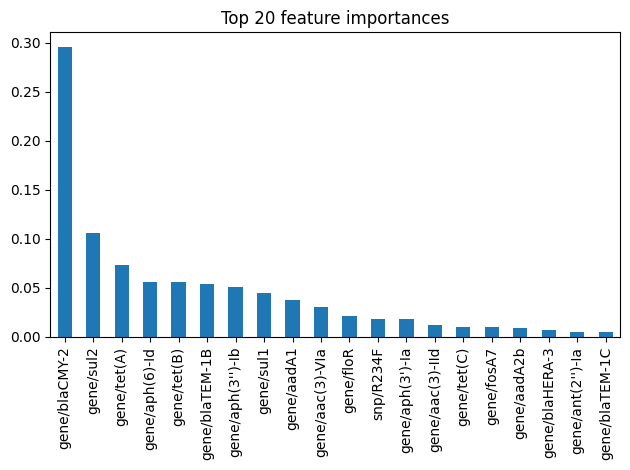

In [ ]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

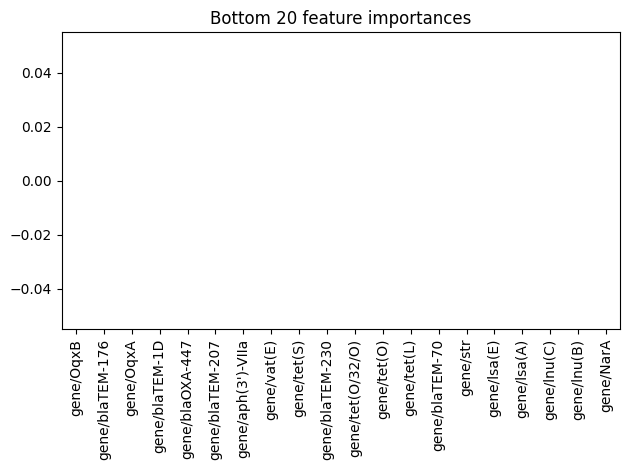

In [ ]:
# Plot bottom 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[-20:]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Bottom 20 feature importances")
fig.tight_layout()

In [ ]:
# SANITY CHECK
# This cell is meant to be run optionally between each approach.
# This code will check whether we have a very imbalance dataset or maybe some intrusion within the input data:
# Use the following snippet to check that out. It should give a low accuracy.

accuracy_score(y_test, DummyClassifier().fit(X_train, y_train).predict(X_test))

0.08764044943820225

## Approach 2: only ARGs data

In [ ]:
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,3770,2973,3840,3781,3769,4292,4441,3887,4381,2856,3016,1979,4396
1.0,678,1475,608,667,679,156,7,561,67,1592,1432,2469,52


In [ ]:
X = pd.merge(y.reset_index()[["sample_name"]], args_df, how="left", on="sample_name")
X = X.fillna(-1).set_index("sample_name")
X

,gene/NarA,gene/NarB,gene/aac(3)-IId,gene/aac(3)-VIa,gene/aac(6')-Iaa,gene/aac(6')-aph(2''),gene/aadA1,gene/aadA2,gene/aadE-Cc,gene/ant(2'')-Ia,...,gene/ere(A),gene/erm(42),gene/fosA3,gene/mph(E),gene/msr(E),gene/qnrA1,gene/qnrB2,gene/qnrB77,gene/qnrS2,gene/tet(D)
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_003869435.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003870275.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003870555.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003872315.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003872455.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_001242565.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_007189195.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_008426085.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8584269662921349


In [ ]:
print(classification_report(y_test, y_pred, target_names=y.columns))

                               precision    recall  f1-score   support

  amoxicillin-clavulanic acid       0.98      0.96      0.97       127
                   ampicillin       0.99      0.95      0.97       311
                    cefoxitin       0.89      0.95      0.92       113
                    ceftiofur       0.97      0.96      0.96       127
                  ceftriaxone       0.98      0.94      0.96       131
              chloramphenicol       1.00      0.88      0.93        48
                ciprofloxacin       0.00      0.00      0.00         2
                   gentamicin       0.89      0.94      0.91       114
               nalidixic acid       0.00      0.00      0.00        19
                 streptomycin       0.90      0.93      0.91       315
                sulfisoxazole       0.97      0.97      0.97       292
                 tetracycline       0.98      0.99      0.98       495
trimethoprim-sulfamethoxazole       0.82      0.60      0.69        15

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


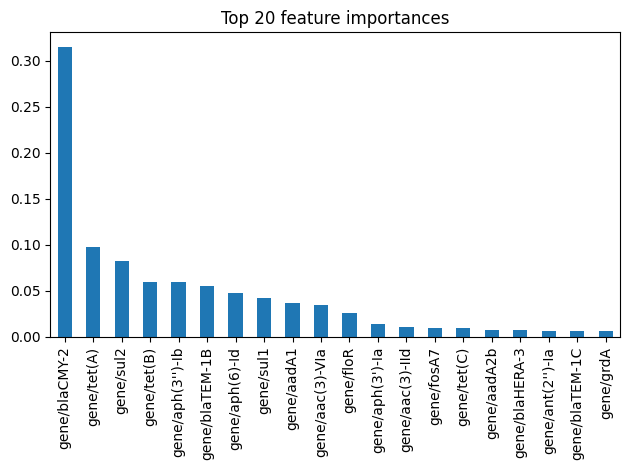

In [ ]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

In [ ]:
# SANITY CHECK
# This cell is meant to be run optionally between each approach.
# This code will check whether we have a very imbalance dataset or maybe some intrusion within the input data:
# Use the following snippet to check that out. It should give a low accuracy.

accuracy_score(y_test, DummyClassifier().fit(X_train, y_train).predict(X_test))

0.09101123595505618

## Approach 3: only SNPs data

In [ ]:
y = pd.merge(snps_df["SAMPLE_ID"], amr_labels_df, left_on="SAMPLE_ID", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("SAMPLE_ID")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,3767,2970,3837,3778,3766,4289,4438,3885,4378,2854,3014,1976,4393
1.0,678,1475,608,667,679,156,7,560,67,1591,1431,2469,52


In [ ]:
X = pd.merge(y.reset_index()[["SAMPLE_ID"]], snps_df, how="left", on="SAMPLE_ID") # We do this in order to avoid null antibiotics labels
X = X.fillna(-1).set_index("SAMPLE_ID")
X

,snp/ S357N,snp/D350N,snp/E350Q,snp/E448K,snp/R234F,snp/T86I,snp/D87N,snp/S80I,snp/S83F,snp/T18P,snp/D87Y,snp/D87G,snp/S464Y,snp/ G103S,snp/Y137H,snp/S83L,snp/V146F
SAMPLE_ID,,,,,,,,,,,,,,,,,
GCA_003869435.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GCA_003870275.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GCA_003870555.1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0
GCA_003872315.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GCA_003872455.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_001952475.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GCF_001952565.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GCF_003589785.1,1,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.23397075365579303


In [ ]:
print(classification_report(y_test, y_pred, target_names=y.columns))

                               precision    recall  f1-score   support

  amoxicillin-clavulanic acid       0.33      0.01      0.01       141
                   ampicillin       0.62      0.02      0.03       303
                    cefoxitin       0.33      0.01      0.02       124
                    ceftiofur       1.00      0.02      0.04       141
                  ceftriaxone       1.00      0.02      0.04       144
              chloramphenicol       1.00      0.04      0.07        28
                ciprofloxacin       1.00      0.50      0.67         2
                   gentamicin       0.00      0.00      0.00       124
               nalidixic acid       0.91      0.71      0.80        14
                 streptomycin       0.75      0.01      0.02       319
                sulfisoxazole       0.67      0.01      0.03       268
                 tetracycline       0.64      0.65      0.64       490
trimethoprim-sulfamethoxazole       0.00      0.00      0.00        12

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


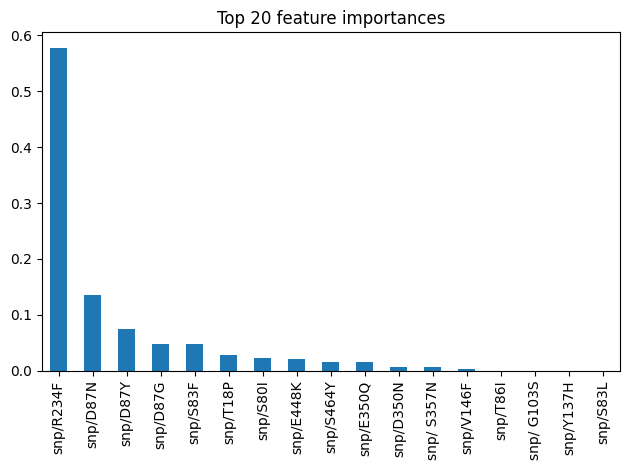

In [ ]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

In [ ]:
# SANITY CHECK
# This cell is meant to be run optionally between each approach.
# This code will check whether we have a very imbalance dataset or maybe some intrusion within the input data:
# Use the following snippet to check that out. It should give a low accuracy.

accuracy_score(y_test, DummyClassifier().fit(X_train, y_train).predict(X_test))

0.08998875140607424

## Conclusion

After trying different approaches, we have noticed that the best performing data correspond to mix between ARGs and SNPs. Although SNPs data is not really providing too much information, it indeed increases the overall accuracy when train with ARGs data

# Model hyperparameter tunning

In [13]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Prepare data
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()

X = pd.merge(args_df, snps_df, how="left", left_on="sample_name", right_on="SAMPLE_ID")
X = pd.merge(y.reset_index()[["sample_name"]], X, how="left", on="sample_name")
X = X.fillna(-1).drop("SAMPLE_ID", axis=1).set_index("sample_name")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
y_train.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,3011,2381,3067,3025,3015,3436,3551,3106,3506,2260,2414,1572,3516
1.0,547,1177,491,533,543,122,7,452,52,1298,1144,1986,42


## Random Forest


We have already tried this model with default parameters but Random Forest has multiple hyperparameters to tune. First of all, we are going to choose some values for each parameter.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False}

In [ ]:
rf = RandomForestClassifier(**{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False})
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=110, max_features='auto',
                       min_samples_split=10, n_estimators=1600)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8808988764044944


In [ ]:
print(classification_report(y_test, y_pred, target_names=y.columns))

                               precision    recall  f1-score   support

  amoxicillin-clavulanic acid       0.98      0.94      0.96       139
                   ampicillin       0.97      0.95      0.96       306
                    cefoxitin       0.90      0.97      0.93       123
                    ceftiofur       0.98      0.98      0.98       133
                  ceftriaxone       0.97      0.97      0.97       134
              chloramphenicol       0.93      0.97      0.95        29
                ciprofloxacin       0.00      0.00      0.00         1
                   gentamicin       0.93      0.91      0.92       123
               nalidixic acid       1.00      0.33      0.50        18
                 streptomycin       0.89      0.94      0.92       317
                sulfisoxazole       0.99      0.96      0.97       303
                 tetracycline       0.98      0.97      0.97       500
trimethoprim-sulfamethoxazole       0.75      0.43      0.55         7

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CNN (DISCONTINUED)

In [ ]:
# Just in case
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier().fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test)

clf.score(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8887640449438202

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalize all columns using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(3558, 178)

In [ ]:
# Reshape the input data so we can feed it into a CNN
X_train_reshaped = tf.reshape(X_train_scaled, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = tf.reshape(X_test_scaled, (X_test.shape[0], X_test.shape[1], 1))
X_train_reshaped.shape

TensorShape([3558, 178, 1])

In [ ]:
# Normal DNN (Deep Neural Network)
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

# Print the model summary
dnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                11456     
                                                                 
 dense_35 (Dense)            (None, 64)                4160      
                                                                 
 dense_36 (Dense)            (None, 2)                 130       
                                                                 
Total params: 15,746
Trainable params: 15,746
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# CNN
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train_reshaped.shape[1:]),
    tf.keras.layers.Conv1D(8, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(8, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid') # y_train.shape
])

# Print the model summary
cnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 176, 8)            32        
                                                                 
 batch_normalization_10 (Bat  (None, 176, 8)           32        
 chNormalization)                                                
                                                                 
 conv1d_21 (Conv1D)          (None, 174, 8)            200       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 87, 8)            0         
 1D)                                                             
                                                                 
 flatten_11 (Flatten)        (None, 696)               0         
                                                                 
 dense_41 (Dense)            (None, 128)             

In [ ]:
# Compile
cnn_model.compile(loss="binary_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
history = cnn_model.fit(X_train_reshaped, y_train[["ampicillin"]], epochs=50, batch_size=8, validation_data=(X_test_reshaped, y_test[["ampicillin"]]))

Epoch 1/50
445/445 [==============================] - 4s 6ms/step - loss: 0.1517 - accuracy: 0.9567 - val_loss: 0.1650 - val_accuracy: 0.9787
Epoch 2/50
445/445 [==============================] - 3s 7ms/step - loss: 0.0946 - accuracy: 0.9820 - val_loss: 0.0823 - val_accuracy: 0.9876
Epoch 3/50
445/445 [==============================] - 2s 5ms/step - loss: 0.0899 - accuracy: 0.9815 - val_loss: 0.0925 - val_accuracy: 0.9876
Epoch 4/50
445/445 [==============================] - 2s 5ms/step - loss: 0.0900 - accuracy: 0.9820 - val_loss: 0.0773 - val_accuracy: 0.9865
Epoch 5/50
445/445 [==============================] - 2s 5ms/step - loss: 0.0857 - accuracy: 0.9834 - val_loss: 0.0788 - val_accuracy: 0.9876
Epoch 6/50
445/445 [==============================] - 2s 5ms/step - loss: 0.0832 - accuracy: 0.9837 - val_loss: 0.0822 - val_accuracy: 0.9865
Epoch 7/50
445/445 [==============================] - 3s 7ms/step - loss: 0.0878 - accuracy: 0.9829 - val_loss: 0.0873 - val_accuracy: 0.9854
Epoch 

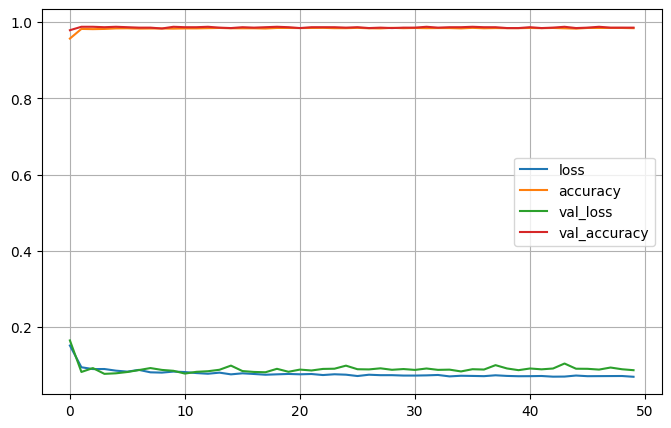

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
cnn_model.evaluate(X_test_reshaped, y_test[["ampicillin"]])

28/28 [==============================] - 0s 8ms/step - loss: 0.0869 - accuracy: 0.9854


[0.0869438424706459, 0.9853932857513428]

# Model evaluation

In [19]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Prepare data
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()

X = pd.merge(args_df, snps_df, how="left", left_on="sample_name", right_on="SAMPLE_ID")
X = pd.merge(y.reset_index()[["sample_name"]], X, how="left", on="sample_name")
X = X.fillna(-1).drop("SAMPLE_ID", axis=1).set_index("sample_name")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

### K-fold CrossValidation

In [25]:
# Create an instance of Random Forest Classifier
rf = RandomForestClassifier(**{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False})


pd.DataFrame(cross_validate(rf, X, y, cv=5, scoring=("accuracy", "f1_macro", "roc_auc"), n_jobs=-1)).mean()


fit_time         36.002859
score_time        5.638610
test_accuracy     0.869378
test_f1_macro     0.818528
test_roc_auc      0.971562
dtype: float64

### ROC curve

In [ ]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
# Fit and predict model
rf = RandomForestClassifier(**{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False})

rf.fit(X_train, y_train)

# Make predictions on the test set
y_scores = rf.predict_proba(X_test)


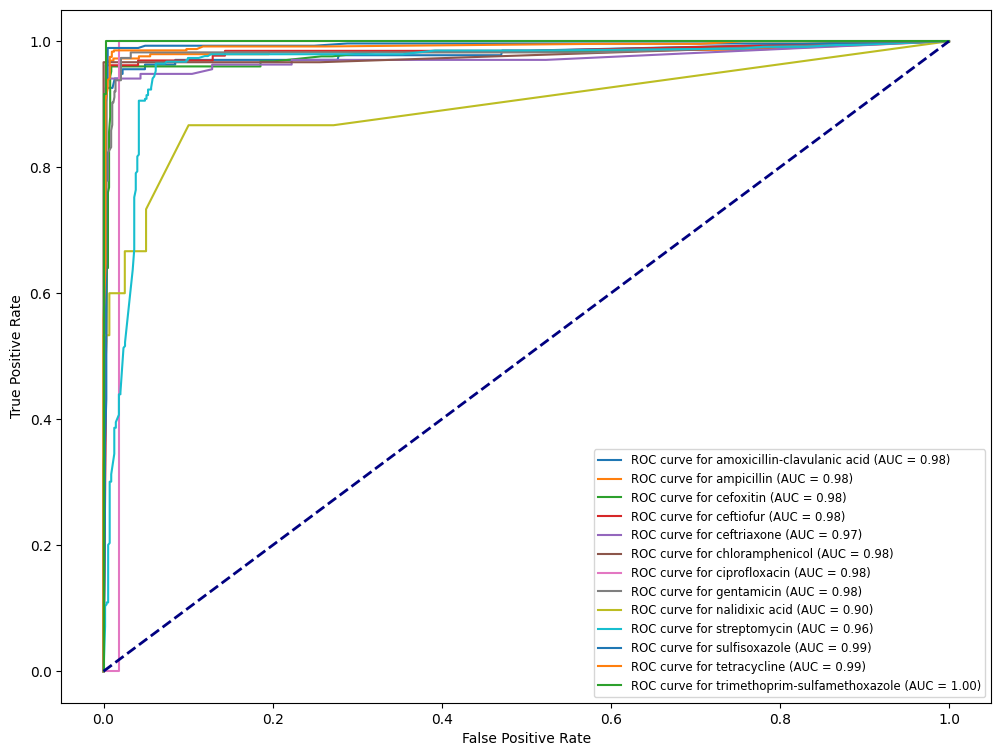

In [71]:
fig, ax = plt.subplots(figsize=(12,9))

for class_id, class_name in enumerate(y_test.columns):
    RocCurveDisplay.from_predictions(
        y_test.iloc[:, class_id],
        y_scores[class_id][:,1],
        name=f"ROC curve for {class_name}",
        ax=ax,
    )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right", fontsize="small")
plt.show()

## CNN (DISCONTINUED)

In [ ]:
#TODO